# Getting Started with Grid Status API

This notebook demonstrates how to use the Grid Status API to retrieve and visualize data about electricity grid datasets.

For more information about the API, please visit: https://www.gridstatus.io/api

To retrieve your API key, create a Grid Status account and go to the [settings page](https://www.gridstatus.io/settings/api) to get your API key.

In [1]:
# Run to get latest version of client
# %pip install --upgrade gridstatusio

In [2]:
from gridstatusio import GridStatusClient

## Setting up the API client

First, we need to set up the GridStatusClient by providing our API key. You can either set the API key using the `GRIDSTATUS_API_KEY` environment variable or pass it to the constructor directly.

In [3]:
# client = GridStatusClient(api_key="YOUR_API_KEY_HERE")
client = GridStatusClient()

GridStatusClient(host=https://api.gridstatus.io/v1)

## Listing datasets

To search for datasets, you can use the `list_datasets` method. You can list all available datasets or provide a filter term to search for specific datasets.

In [4]:
client.list_datasets(filter_term="ERCOT SPP")

+-------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|           Key           |                                                                                    Value                                                                                     |
+-------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|          Name           |                                                                          ERCOT SPP Day Ahead Hourly                                                                          |
|           ID            |                                                                          ercot_spp_day_ahead_hourly                                                             

## Retrieving data from a dataset

You can retrieve data from a dataset by specifying its ID and the date range. By default, the data is returned in UTC.

**Make sure to always set a `limit` for your queries to avoid exceeding the monthly row limit for your API key**

In [5]:
QUERY_LIMIT = 10_000

10000

In [6]:
data_utc = client.get_dataset(
    dataset="ercot_spp_day_ahead_hourly",
    start="2023-04-01",
    end="2023-04-03",
    limit=QUERY_LIMIT,
)

data_utc

Fetching Page 1...Done in 1.14 seconds. 

Total number of rows: 10000


,interval_start_utc,interval_end_utc,location,location_type,market,spp
0,2023-04-01 00:00:00+00:00,2023-04-01 01:00:00+00:00,AEEC,Resource Node,DAY_AHEAD_HOURLY,-21.7800
1,2023-04-01 00:00:00+00:00,2023-04-01 01:00:00+00:00,AGUAYO_UNIT1,Resource Node,DAY_AHEAD_HOURLY,37.3000
2,2023-04-01 00:00:00+00:00,2023-04-01 01:00:00+00:00,AJAXWIND_RN,Resource Node,DAY_AHEAD_HOURLY,25.7600
3,2023-04-01 00:00:00+00:00,2023-04-01 01:00:00+00:00,ALGOD_ALL_RN,Resource Node,DAY_AHEAD_HOURLY,52.9000
4,2023-04-01 00:00:00+00:00,2023-04-01 01:00:00+00:00,ALVIN_RN,Resource Node,DAY_AHEAD_HOURLY,46.1100
...,...,...,...,...,...,...
39595,2023-04-02 23:00:00+00:00,2023-04-03 00:00:00+00:00,WOV_BESS_RN,Resource Node,DAY_AHEAD_HOURLY,20.0200
39596,2023-04-02 23:00:00+00:00,2023-04-03 00:00:00+00:00,W_PECO_UNIT1,Resource Node,DAY_AHEAD_HOURLY,23.3200
39597,2023-04-02 23:00:00+00:00,2023-04-03 00:00:00+00:00,WRSBES_BESS1,Resource Node,DAY_AHEAD_HOURLY,23.8100
39598,2023-04-02 23:00:00+00:00,2023-04-03 00:00:00+00:00,X443ESRN,Resource Node,DAY_AHEAD_HOURLY,34.2300


## Retrieving data in local time

If you want to retrieve data in local time instead of UTC, you can pass a time zone to the `get_dataset` method.

In [7]:
data_local = client.get_dataset(
    dataset="ercot_spp_day_ahead_hourly",
    start="2023-04-01",
    end="2023-04-03",
    tz="US/Central",
    limit=QUERY_LIMIT,
)

data_local

Fetching Page 1...Done in 0.81 seconds. 

Total number of rows: 10000


,interval_start_local,interval_end_local,location,location_type,market,spp
0,2023-04-01 00:00:00-05:00,2023-04-01 01:00:00-05:00,AEEC,Resource Node,DAY_AHEAD_HOURLY,-65.2400
1,2023-04-01 00:00:00-05:00,2023-04-01 01:00:00-05:00,AGUAYO_UNIT1,Resource Node,DAY_AHEAD_HOURLY,20.0900
2,2023-04-01 00:00:00-05:00,2023-04-01 01:00:00-05:00,AJAXWIND_RN,Resource Node,DAY_AHEAD_HOURLY,7.6500
3,2023-04-01 00:00:00-05:00,2023-04-01 01:00:00-05:00,ALGOD_ALL_RN,Resource Node,DAY_AHEAD_HOURLY,22.8400
4,2023-04-01 00:00:00-05:00,2023-04-01 01:00:00-05:00,ALVIN_RN,Resource Node,DAY_AHEAD_HOURLY,19.7700
...,...,...,...,...,...,...
39595,2023-04-02 23:00:00-05:00,2023-04-03 00:00:00-05:00,WOV_BESS_RN,Resource Node,DAY_AHEAD_HOURLY,57.8600
39596,2023-04-02 23:00:00-05:00,2023-04-03 00:00:00-05:00,W_PECO_UNIT1,Resource Node,DAY_AHEAD_HOURLY,56.4400
39597,2023-04-02 23:00:00-05:00,2023-04-03 00:00:00-05:00,WRSBES_BESS1,Resource Node,DAY_AHEAD_HOURLY,56.6200
39598,2023-04-02 23:00:00-05:00,2023-04-03 00:00:00-05:00,X443ESRN,Resource Node,DAY_AHEAD_HOURLY,22.2700


## Filtering data in the query

You can also filter data in your query by specifying a filter column and filter value. This can be helpful when you want to retrieve data for a specific location or node. For example, let's get the average day ahead price for the Houston Hub in April 2023.

In [8]:
data_houston_apr = client.get_dataset(
    dataset="ercot_spp_day_ahead_hourly",
    start="2023-04-01",
    end="2023-05-01",
    filter_column="location",
    filter_value="HB_HOUSTON",
    tz="US/Central",
    limit=QUERY_LIMIT,
)

data_houston_apr

Fetching Page 1...Done in 1.55 seconds. 

Total number of rows: 720


,interval_start_local,interval_end_local,location,location_type,market,spp
0,2023-04-01 00:00:00-05:00,2023-04-01 01:00:00-05:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,19.4400
1,2023-04-01 01:00:00-05:00,2023-04-01 02:00:00-05:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,17.3800
2,2023-04-01 02:00:00-05:00,2023-04-01 03:00:00-05:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,16.7400
3,2023-04-01 03:00:00-05:00,2023-04-01 04:00:00-05:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,16.6800
4,2023-04-01 04:00:00-05:00,2023-04-01 05:00:00-05:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,18.5500
...,...,...,...,...,...,...
715,2023-04-30 19:00:00-05:00,2023-04-30 20:00:00-05:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,34.0700
716,2023-04-30 20:00:00-05:00,2023-04-30 21:00:00-05:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,26.9400
717,2023-04-30 21:00:00-05:00,2023-04-30 22:00:00-05:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,19.5100
718,2023-04-30 22:00:00-05:00,2023-04-30 23:00:00-05:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,17.7100


## Filter Operators

You can also use the `filter_operator` parameter to specify how to filter the data. For example, we can use the `in` operator to get data for both Houston and West Texas.

Supports "=", "!=", ">", "<", ">=", "<=", and "in". Defaults to "=".

In [9]:
data_both_apr = client.get_dataset(
    dataset="ercot_spp_day_ahead_hourly",
    start="2023-04-01",
    end="2023-05-01",
    filter_column="location",
    filter_operator="in",
    filter_value=["HB_HOUSTON", "HB_WEST"],
    tz="US/Central",
    limit=QUERY_LIMIT,
)

data_both_apr

Fetching Page 1...Done in 0.27 seconds. 

Total number of rows: 1440


,interval_start_local,interval_end_local,location,location_type,market,spp
0,2023-04-01 00:00:00-05:00,2023-04-01 01:00:00-05:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,19.4400
1,2023-04-01 00:00:00-05:00,2023-04-01 01:00:00-05:00,HB_WEST,Trading Hub,DAY_AHEAD_HOURLY,49.0700
2,2023-04-01 01:00:00-05:00,2023-04-01 02:00:00-05:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,17.3800
3,2023-04-01 01:00:00-05:00,2023-04-01 02:00:00-05:00,HB_WEST,Trading Hub,DAY_AHEAD_HOURLY,47.6100
4,2023-04-01 02:00:00-05:00,2023-04-01 03:00:00-05:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,16.7400
...,...,...,...,...,...,...
1435,2023-04-30 21:00:00-05:00,2023-04-30 22:00:00-05:00,HB_WEST,Trading Hub,DAY_AHEAD_HOURLY,16.1200
1436,2023-04-30 22:00:00-05:00,2023-04-30 23:00:00-05:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,17.7100
1437,2023-04-30 22:00:00-05:00,2023-04-30 23:00:00-05:00,HB_WEST,Trading Hub,DAY_AHEAD_HOURLY,14.4800
1438,2023-04-30 23:00:00-05:00,2023-05-01 00:00:00-05:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,16.6200


## Visualizing the data

Now that we have retrieved the data for the Houston Hub vs West Hub in April 2023, let's plot it using Plotly

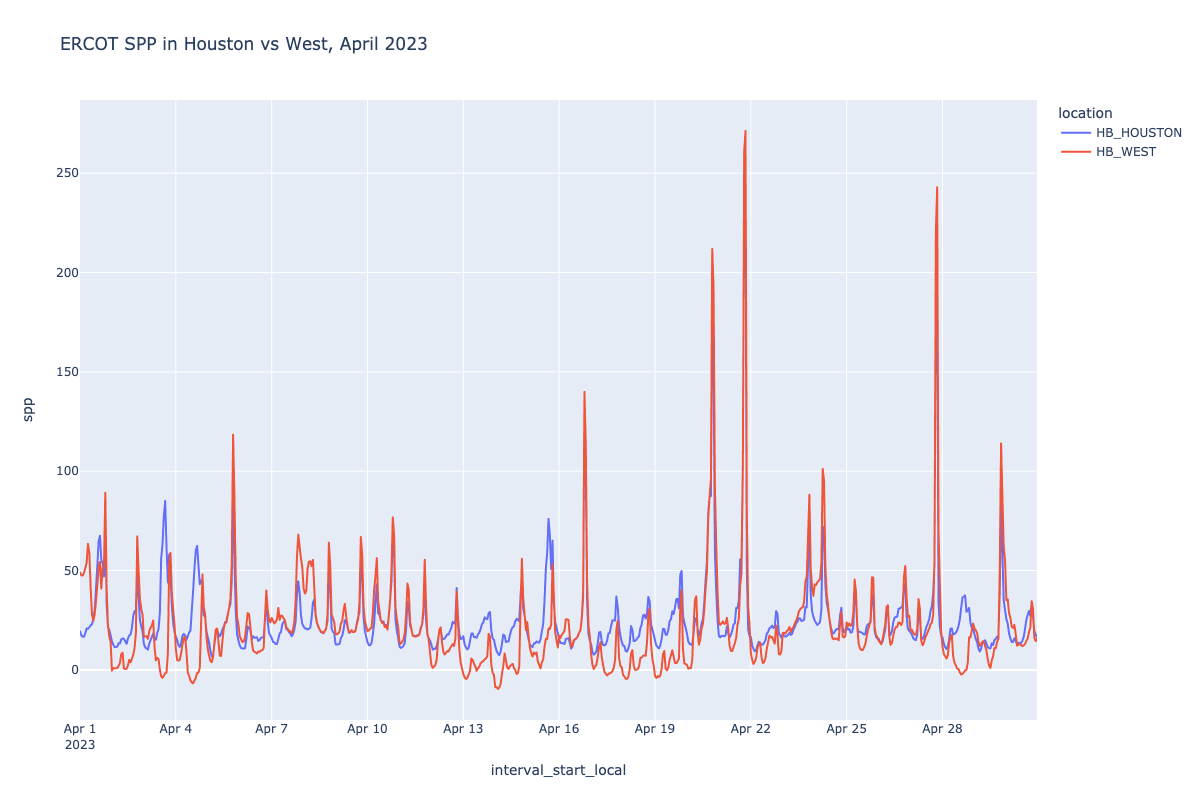

In [10]:
import plotly.express as px

fig = px.line(
    data_both_apr,
    x="interval_start_local",
    y="spp",
    color="location",
    title="ERCOT SPP in Houston vs West, April 2023",
)
fig.show("png", width=1200, height=800)

## Selecting Subset of Columns

We can select a subset of columns by passing a list of column names to the `columns` parameter. For example, if we want the output for a particular wind resource

In [11]:
big_star = client.get_dataset(
    dataset="ercot_sced_gen_resource_60_day",
    start="2023-04-02",
    end="2023-04-03",
    columns=[
        "interval_start_utc",
        "interval_end_utc",
        "resource_name",
        "resource_type",
        "telemetered_net_output",
    ],
    filter_column="resource_name",
    filter_operator="in",
    filter_value=["BIG_STAR_UNIT1", "BIG_STAR_UNIT2"],
    tz="US/Central",
)

big_star

Fetching Page 1...Done in 0.85 seconds. 

Total number of rows: 192


,interval_start_local,interval_end_local,resource_name,resource_type,telemetered_net_output
0,2023-04-02 00:00:00-05:00,2023-04-02 00:15:00-05:00,BIG_STAR_UNIT1,PVGR,0.0000
1,2023-04-02 00:00:00-05:00,2023-04-02 00:15:00-05:00,BIG_STAR_UNIT2,PVGR,0.0000
2,2023-04-02 00:15:00-05:00,2023-04-02 00:30:00-05:00,BIG_STAR_UNIT1,PVGR,0.0000
3,2023-04-02 00:15:00-05:00,2023-04-02 00:30:00-05:00,BIG_STAR_UNIT2,PVGR,0.0000
4,2023-04-02 00:30:00-05:00,2023-04-02 00:45:00-05:00,BIG_STAR_UNIT1,PVGR,0.0000
...,...,...,...,...,...
187,2023-04-02 23:15:00-05:00,2023-04-02 23:30:00-05:00,BIG_STAR_UNIT2,PVGR,0.0000
188,2023-04-02 23:30:00-05:00,2023-04-02 23:45:00-05:00,BIG_STAR_UNIT1,PVGR,0.0000
189,2023-04-02 23:30:00-05:00,2023-04-02 23:45:00-05:00,BIG_STAR_UNIT2,PVGR,0.0000
190,2023-04-02 23:45:00-05:00,2023-04-03 00:00:00-05:00,BIG_STAR_UNIT1,PVGR,0.0000


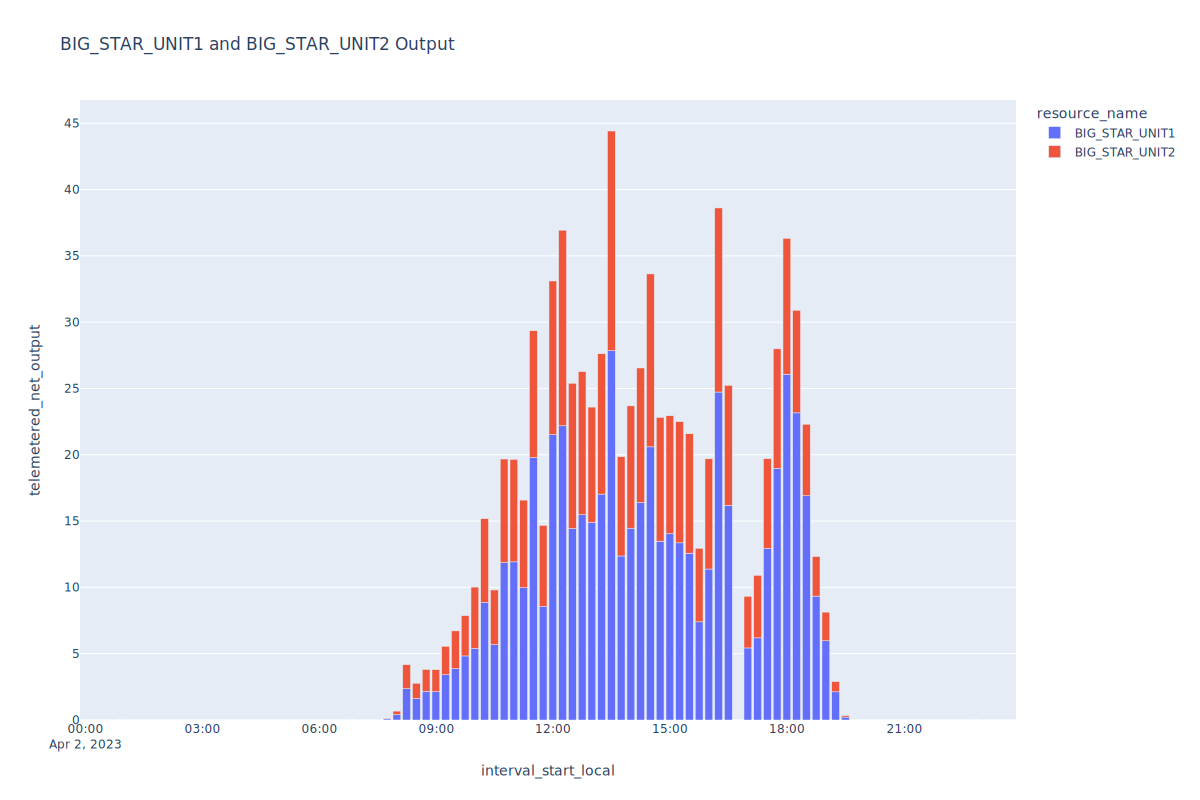

In [12]:
fig = px.bar(
    big_star,
    x="interval_start_local",
    y="telemetered_net_output",
    color="resource_name",
    title="BIG_STAR_UNIT1 and BIG_STAR_UNIT2 Output",
)

fig.show("svg", width=1200, height=800)